# Import libraries

In [ ]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from pathlib import Path
from time import time

# Question


1. 預測新電影的票房是否會成功
2. 電影成功的主要因素
3. 獲取收入超過2百萬美元且支出少於1百萬美元的電影



# Prepare: load file

In [ ]:
# Load the IMDb dataset
csv_path = Path.cwd() / '..' / 'files' / 'csv'/ 'movie_metadata.csv'
movie_df = pd.read_csv(csv_path)

# Process

## 了解資料集結構 Understand Dataset

In [ ]:
movie_df.head(3)
# movie_df.head(3).T

In [ ]:
movie_df

In [ ]:
movie_df.columns

## Movie_df 欄位名稱及描述

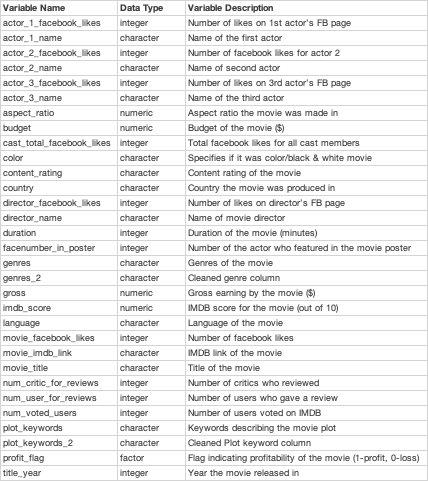

## 基本統計 Basic statistics

In [ ]:
movie_df.info()

In [ ]:
# movie_df.describe(include=object) #non-number column
movie_df.describe() #numeric column

## 資料清洗 Data cleaning

In [ ]:
duplicates = movie_df.duplicated()
movie_df[duplicates]

In [ ]:
# 移除完全重複的列
movie_df.duplicated()
movie_df[movie_df.duplicated(keep=False)]
movie_df.drop_duplicates(inplace=True)
# 移除movie_title重複的列
movie_df.drop_duplicates('movie_title', inplace=True)
# 移除任何空值的列
movie_df.isna().sum()
movie_df.dropna(how='any', inplace=True)
movie_df.head(10)
# # movie.fillna(0, inplace=True)
# # movie.drop('genres', axis=1, inplace=True)
movie_df.corr()
# # movie.index
# # movie.columns
# #df = pd.DataFrame(columns = ('genres', 'avg_score'))  # create a new df
# movie_df.shape

In [ ]:
df.drop_duplicates(subset=['movie_title'], keep='first').head(1) # 移除重複 by movie_title 留第一行
df_subset=df[['imdb_score','genres']].copy() # copy 'imdb_score','genres' columns to new df

In [ ]:
plt.rcParams["figure.figsize"] = [5,5]
a=np.log(movie_df['director_facebook_likes'])
plt.title('imdb_score (Y) vs. log of director_facebook_likes (X)')
plt.plot(a, movie_df['imdb_score'], 'ro')

In [ ]:
#df_genres.corr().sort_values(['imdb_score'], ascending=False, inplace=False)